# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\Abid\anaconda\envs\Lab_12\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [8]:
train_dir = r'E:\ML labs\archive1\computer vision\train'
validation_dir = r'E:\ML labs\archive1\computer vision\validation'
test_dir = r'E:\ML labs\archive1\computer vision\test'

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)



In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='binary')

Found 240 images belonging to 2 classes.


Found 93 images belonging to 2 classes.


In [13]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [14]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20,
                    callbacks=callbacks)

Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.6969 - acc: 0.4856
Epoch 1: val_loss improved from inf to 0.69256, saving model to C:\Users\Abid\anaconda\envs\Lab_12\E1-cp-0001-loss0.69.h5
7/7 [==============================] - 7s 674ms/step - loss: 0.6969 - acc: 0.4856 - val_loss: 0.6926 - val_acc: 0.5376
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.6925 - acc: 0.4952
Epoch 2: val_loss did not improve from 0.69256
7/7 [==============================] - 3s 489ms/step - loss: 0.6925 - acc: 0.4952 - val_loss: 0.7135 - val_acc: 0.3226
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 0.6909 - acc: 0.5048
Epoch 3: val_loss did not improve from 0.69256
7/7 [==============================] - 4s 609ms/step - loss: 0.6909 - acc: 0.5048 - val_loss: 0.7023 - val_acc: 0.3226
Epoch 4/20
7/7 [==============================] - ETA: 0s - loss: 0.6873 - acc: 0.5240
Epoch 4: val_loss did not improve from 0.69256
7/7 [===========================

In [15]:
model_history.history

{'loss': [0.696858823299408,
  0.6925488710403442,
  0.6909446120262146,
  0.687282919883728,
  0.6869440674781799,
  0.6845305562019348,
  0.6809930801391602,
  0.676975667476654,
  0.6790646910667419,
  0.661298394203186,
  0.6636509299278259,
  0.6483970880508423,
  0.6510534286499023,
  0.6455849409103394,
  0.607934296131134,
  0.6168190240859985,
  0.6203482747077942,
  0.6083027720451355,
  0.5955840945243835,
  0.6125255227088928],
 'acc': [0.48557692766189575,
  0.4951923191547394,
  0.504807710647583,
  0.5240384340286255,
  0.5178571343421936,
  0.5480769276618958,
  0.5528846383094788,
  0.6153846383094788,
  0.6346153616905212,
  0.6730769276618958,
  0.5961538553237915,
  0.6346153616905212,
  0.5961538553237915,
  0.629807710647583,
  0.6778846383094788,
  0.7053571343421936,
  0.682692289352417,
  0.6682692170143127,
  0.682692289352417,
  0.6682692170143127],
 'val_loss': [0.6925557255744934,
  0.7135172486305237,
  0.7022929787635803,
  0.7024407386779785,
  0.6854810

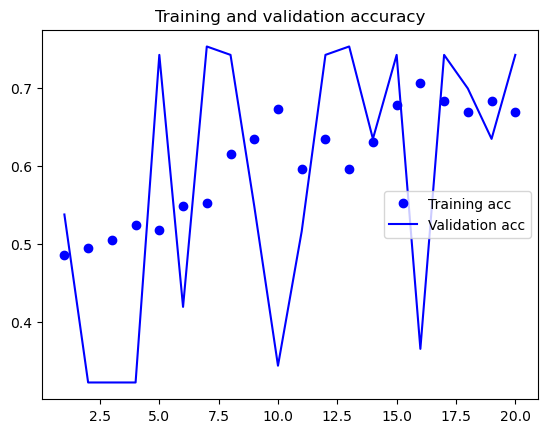

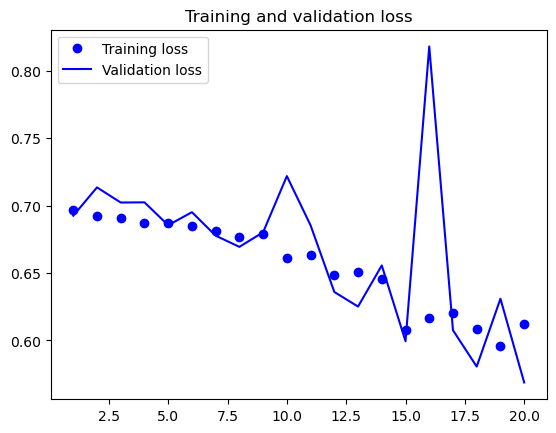

In [16]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

In [12]:
#model.save(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab12\E1-cp-0012-loss0.21.h5')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


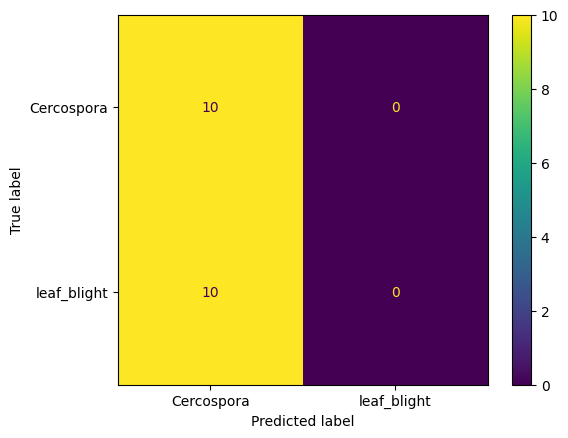

In [13]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, shuffle=False, class_mode='binary')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [14]:
print(classification_report(label, pred, target_names=['Cercospora', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.50      1.00      0.67        10
 leaf_blight       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



e:\ML_Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML_Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML_Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
